In [6]:
import numpy as np
from skimage import io
import cv2
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy.fft import fft2, fftshift, dct, idct
from scipy import fftpack
from PIL import Image
import pywt


Saving namib.jpg to namib (4).jpg


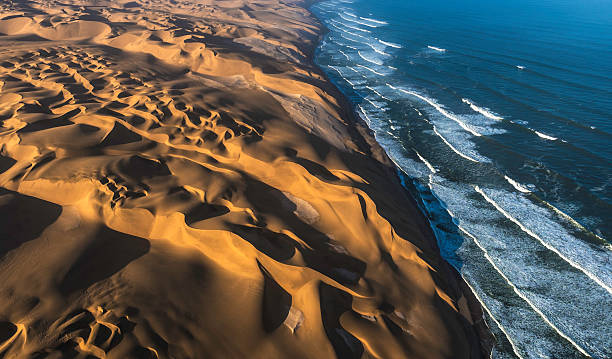

In [7]:
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow

uploaded = files.upload()
file_name = 'namib.jpg'
image = cv2.imread(file_name)
cv2_imshow(image)

In [15]:
def MAE(image1, image2):
    assert image1.shape == image2.shape, 
    return np.mean(np.abs(image1 - image2))


In [16]:
def C(orginal,image):
    bits_org = orginal.dtype.itemsize * 8 * orginal.size
    bits_deco = image.dtype.itemsize * 8 * image.size
    return bits_org / bits_deco


In [17]:
import numpy as np

def custom_compression(image, compression_ratio):
    transformed_image = np.fft.fft2(image)
    sorted_amplitudes = np.sort(np.abs(transformed_image).flatten())
    threshold_index = int((1 - compression_ratio) * len(sorted_amplitudes))
    threshold = sorted_amplitudes[threshold_index]

    transformed_image[np.abs(transformed_image) < threshold] = 0

    
    compressed_image = np.fft.ifft2(transformed_image).real

    return compressed_image


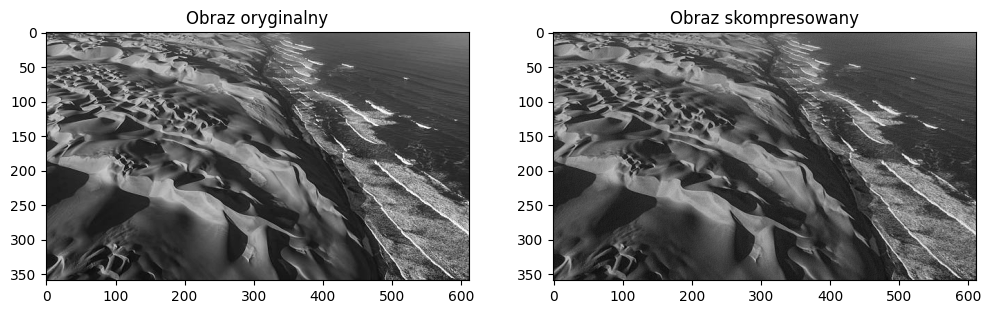

Mean Absolute Error: 0.01740177238894379
Compression Ratio (C): 1.0


In [19]:
image_gray = io.imread("namib.jpg", as_gray=True)
compression_ratio = 0.5
compressed = custom_compression(image_gray, compression_ratio)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap="gray")
plt.title("Obraz oryginalny")

plt.subplot(1, 2, 2)
plt.imshow(compressed, cmap="gray")
plt.title("Obraz skompresowany")
plt.show()

mae_value = MAE(image_gray, compressed)
print(f"Mean Absolute Error: {mae_value}")

compression_ratio_value = C(image_gray, compressed)
print(f"Compression Ratio (C): {compression_ratio_value}")


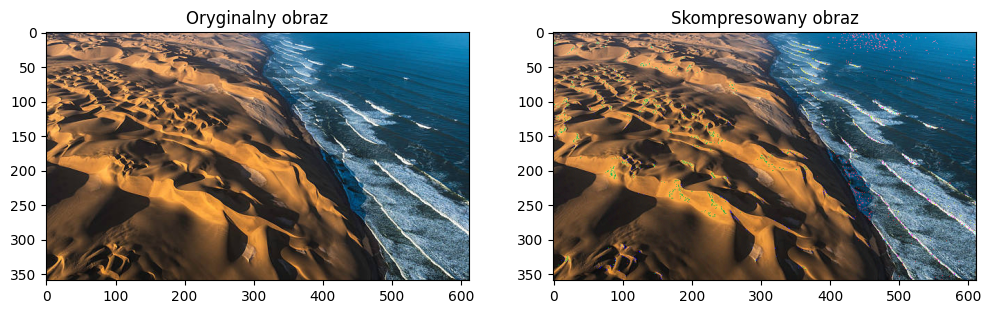

Mean Absolute Error: 1.6995523576865628
Compression Ratio (C): 1.0


In [31]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

def comp(image, r):
    t = np.fft.fft2(image)
    s = np.sort(np.abs(t.flatten()))
    i = int((1 - r) * len(s))
    th = s[i]
    t[np.abs(t) < th] = 0
    return np.fft.ifft2(t).real

def m(image1, image2):
    assert image1.shape == image2.shape, "Obrazy różnych rozmiarów"
    return np.mean(np.abs(image1 - image2))

def cr(original, compressed):
    bits_original = original.dtype.itemsize * 8 * original.size
    bits_compressed = compressed.dtype.itemsize * 8 * compressed.size
    return bits_original / bits_compressed

color_image = io.imread("namib.jpg")
r = 0.5
compressed_color = comp(color_image, r)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(color_image)
plt.title("Oryginalny obraz")

plt.subplot(1, 2, 2)
plt.imshow(np.uint8(compressed_color))
plt.title("Skompresowany obraz")
plt.show()

mae_value = m(color_image, compressed_color)
print(f"Mean Absolute Error: {mae_value}")

compression_ratio_value = cr(color_image, np.uint8(compressed_color))
print(f"Compression Ratio (C): {compression_ratio_value}")
